# Accuracy vs. AUPRC

In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scienceplots
import seaborn as sns
from pathlib import Path

In [2]:
plt.style.use('science')

In [3]:
date = "2023-03-14-22-37-07"
experiment = "hatexplain-lime-distilbert-2"

here_path = Path().absolute()
experiments_path = here_path.parent / "data" / "experiments"
experiment_path = experiments_path / date / experiment
losses_path = experiment_path / "losses.jsonl"
results_path = experiment_path / "results.jsonl"

In [4]:
results = []
with open(results_path, 'r') as f:
    for line in f:
        results.append(json.loads(line))

losses = []
with open(losses_path, 'r') as f:
    for line in f:
        losses.append(json.loads(line))

In [5]:
all_results = sorted(results, key=lambda x: x['weight'])
weights = [result['weight'] for result in results]

losses = sorted(losses, key=lambda x: x['weight'])
weights = [loss['weight'] for loss in losses]
losses = [[loss['cross_entropy_loss'], loss['contrastive_loss']] for loss in losses]
losses = np.array(losses)
losses /= 15382  # Divide by number of HateXplain training samples to convert
                 # from sum to average

In [6]:
def filter_results(results):
    """Filter the results.

    Remove the None and NaN values from the results.

    Args:
        results (list of float): Results to filter.
    
    Returns:
        list of float: Filtered results.
    """
    return [result for result in results \
        if result is not None and not np.isnan(result)]

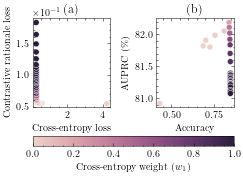

In [7]:
w1 = weights
performance_metric = "accuracy"
explainability_metric = "alternative_auprc"
x = []
y = []
for results in all_results:
    x.append(results['performance'][performance_metric])
    y.append(
        np.mean(
            filter_results(results['explainability'][explainability_metric])
        )
    )
y = [value*100 for value in y]

fig, axes = plt.subplots(1, 2)

sns.scatterplot(
    x="Cross-entropy loss",
    y="Contrastive rationale loss",
    data=pd.DataFrame(
        losses,
        columns=["Cross-entropy loss", "Contrastive rationale loss"]
    ),
    hue=w1,
    ax=axes[0],
)
axes[0].get_legend().remove()
axes[0].ticklabel_format(style='sci', scilimits=(0,0), axis='y')
axes[0].set_title("(a)")

sns.scatterplot(
    x="Accuracy",
    y="AUPRC (\%)",
    data=pd.DataFrame({
        "Accuracy": x,
        "AUPRC (\%)": y,
    }),
    hue=w1,
    ax=axes[1],
)
axes[1].get_legend().remove()
axes[1].set_title("(b)")

norm = plt.Normalize(0, max(w1))
cmap = sns.cubehelix_palette(as_cmap=True)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
fig.tight_layout()
cbar = fig.colorbar(
    sm,
    orientation="horizontal",
    label="Cross-entropy weight ($w_1$)",
    ax=axes.ravel().tolist(),
)
# Get colorbar down a little
cbar.ax.set_position([cbar.ax.get_position().x0, cbar.ax.get_position().y0 - 0.05, cbar.ax.get_position().width, cbar.ax.get_position().height])

plt.savefig("accuracy_auprc_all.pdf", dpi=300, bbox_inches="tight")

In [8]:
weights = weights[1:]
all_results = all_results[1:]
losses = losses[1:]

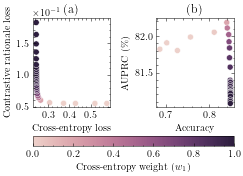

In [9]:
w1 = weights
performance_metric = "accuracy"
explainability_metric = "alternative_auprc"
x = []
y = []
for results in all_results:
    x.append(results['performance'][performance_metric])
    y.append(
        np.mean(
            filter_results(results['explainability'][explainability_metric])
        )
    )
y = [value*100 for value in y]

fig, axes = plt.subplots(1, 2)

sns.scatterplot(
    x="Cross-entropy loss",
    y="Contrastive rationale loss",
    data=pd.DataFrame(
        losses,
        columns=["Cross-entropy loss", "Contrastive rationale loss"]
    ),
    hue=w1,
    ax=axes[0],
)
axes[0].get_legend().remove()
axes[0].ticklabel_format(style='sci', scilimits=(0,0), axis='y')
axes[0].set_title("(a)")

sns.scatterplot(
    x="Accuracy",
    y="AUPRC (\%)",
    data=pd.DataFrame({
        "Accuracy": x,
        "AUPRC (\%)": y,
    }),
    hue=w1,
    ax=axes[1],
)
axes[1].get_legend().remove()
axes[1].set_title("(b)")

norm = plt.Normalize(0, max(w1))
cmap = sns.cubehelix_palette(as_cmap=True)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
fig.tight_layout()
cbar = fig.colorbar(
    sm,
    orientation="horizontal",
    label="Cross-entropy weight ($w_1$)",
    ax=axes.ravel().tolist(),
)
# Get colorbar down a little
cbar.ax.set_position([cbar.ax.get_position().x0, cbar.ax.get_position().y0 - 0.05, cbar.ax.get_position().width, cbar.ax.get_position().height])

plt.savefig("accuracy_auprc.pdf", dpi=300, bbox_inches="tight")

In [10]:
alternative_auprcs = []
accuracies = []
for results in all_results:
    alternative_auprcs.append(
        np.mean(
            filter_results(results['explainability'][explainability_metric])
        )
    )
    accuracies.append(results['performance'][performance_metric])

In [11]:
print(max(alternative_auprcs), alternative_auprcs[-1])
print(max(alternative_auprcs) - alternative_auprcs[-1])
print(max(alternative_auprcs)/alternative_auprcs[-1])

0.821847995830308 0.8107765101245601
0.011071485705747897
1.0136554100513433


In [12]:
print(accuracies[np.argmax(alternative_auprcs)], accuracies[-1])
print(accuracies[np.argmax(alternative_auprcs)] - accuracies[-1])
print(accuracies[np.argmax(alternative_auprcs)]/accuracies[-1])

0.8396363636363636 0.8476363636363636
-0.008000000000000007
0.9905619905619906
